# Trending Titles: Investigating the Hits of Netflix

# Project Outline

1) Introduction to project

2) Understanding the business problem

3) Understanding the dataset

4) Data cleaning for exploration

5) Data visualisation

6) Defining the trends and patterns

7) Conclusion

# Introduction to project
This project is a data analysis and visualisation project the aim of which is to highlight the main features of the given dataset while also extracting valuable insights from it to help understand some key trends in the entertainment industry

# Understanding the business problem:

In the context of analyzing this Netflix dataset, the business problem revolves around optimizing content selection, recommendation algorithms and enhancing user experience.

By understanding insights from the dataset, the aim is to understand the factors that contribute to the success and popularity of movies on the platform. In this dataset, movies with an IMDb score equal to or greater than 6.0 are considered as "Hit" movies indicating their successfull performance among the viewers. Those that do not cross the threshold IMDb score are classified as "Flop" indicating that their performance was not as satisfying on the streaming platform.

This data analysis project includes identifying the characteristics of high-rated movies, exploring trends in viewer preferences across different genres, languages, and release years, and uncovering patterns in runtime duration that resonate with audiences.

#  Understanding the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/kaggle/input/netflix-dataset-for-analysis/netflix.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       583 non-null    object 
 1   genre       583 non-null    object 
 2   language    583 non-null    object 
 3   imdb_score  583 non-null    float64
 4   premiere    583 non-null    object 
 5   runtime     583 non-null    int64  
 6   year        583 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 32.0+ KB


In [4]:
df.head()

,title,genre,language,imdb_score,premiere,runtime,year
0,Notes for My Son,Drama,Spanish,6.3,11/24/2020,83,2020
1,"To Each, Her Own",Romantic comedy,French,5.3,6/24/2018,95,2018
2,The Lovebirds,Romantic comedy,English,6.1,5/22/2020,87,2020
3,The Perfection,Horror-thriller,English,6.1,5/24/2019,90,2019
4,Happy Anniversary,Romantic comedy,English,5.8,3/30/2018,78,2018


In [5]:
df.describe()

,imdb_score,runtime,year
count,583.000000,583.000000,583.000000
mean,6.275129,93.490566,2018.934820
std,0.976678,27.706665,1.474598
min,2.500000,4.000000,2014.000000
25%,5.700000,86.000000,2018.000000
50%,6.400000,97.000000,2019.000000
75%,7.000000,107.500000,2020.000000
max,9.000000,209.000000,2021.000000


In [6]:
df.isnull().sum()

title         0
genre         0
language      0
imdb_score    0
premiere      0
runtime       0
year          0
dtype: int64

In [7]:
# Defining the threshold value
threshold = 6.0

# Creating two new columns based on the condition that shows whether a Title was a Hit on Netflix or a Flop
df['Hit'] = df['imdb_score'] >= threshold
df['Flop'] = df['imdb_score'] < threshold
df.head()

,title,genre,language,imdb_score,premiere,runtime,year,Hit,Flop
0,Notes for My Son,Drama,Spanish,6.3,11/24/2020,83,2020,True,False
1,"To Each, Her Own",Romantic comedy,French,5.3,6/24/2018,95,2018,False,True
2,The Lovebirds,Romantic comedy,English,6.1,5/22/2020,87,2020,True,False
3,The Perfection,Horror-thriller,English,6.1,5/24/2019,90,2019,True,False
4,Happy Anniversary,Romantic comedy,English,5.8,3/30/2018,78,2018,False,True


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       583 non-null    object 
 1   genre       583 non-null    object 
 2   language    583 non-null    object 
 3   imdb_score  583 non-null    float64
 4   premiere    583 non-null    object 
 5   runtime     583 non-null    int64  
 6   year        583 non-null    int64  
 7   Hit         583 non-null    bool   
 8   Flop        583 non-null    bool   
dtypes: bool(2), float64(1), int64(2), object(4)
memory usage: 33.1+ KB


# Data cleaning for exploration

In [9]:
df['genre'].value_counts()

genre
Documentary                    159
Drama                           77
Comedy                          49
Romantic comedy                 39
Thriller                        33
                              ... 
Political thriller               1
Fantasy                          1
Romantic comedy-drama            1
Animation/Musical/Adventure      1
Supernatural drama               1
Name: count, Length: 114, dtype: int64

In [10]:
import pandas as pd

#removing genres that have less than 5 movies in dataset for analysis purposes.

genre_counts = df['genre'].value_counts()

valid = genre_counts[genre_counts >= 5].index

filtered_df = df[df['genre'].isin(valid)]
df = filtered_df.copy()

# Display the updated dataframe
print(df)

                                                 title            genre  \
0                                     Notes for My Son            Drama   
1                                     To Each, Her Own  Romantic comedy   
2                                        The Lovebirds  Romantic comedy   
4                                    Happy Anniversary  Romantic comedy   
5                                 Why Did You Kill Me?      Documentary   
..                                                 ...              ...   
575                                          Long Shot      Documentary   
578  Rolling Thunder Revue: A bob Dylan Story by Ma...      Documentary   
580                                       Squared Love  Romantic comedy   
581                                         My Own Man      Documentary   
582                      Biggie: I Got a Story to Tell      Documentary   

    language  imdb_score    premiere  runtime  year    Hit   Flop  
0    Spanish         6.3  11/24

In [11]:
df['genre'].value_counts()

genre
Documentary              159
Drama                     77
Comedy                    49
Romantic comedy           39
Thriller                  33
Comedy-drama              14
Crime drama               11
Horror                     9
Biopic                     9
Action                     7
Romance                    6
Concert Film               6
Aftershow / Interview      6
Action comedy              5
Animation                  5
Romantic drama             5
Name: count, dtype: int64

In [12]:
import pandas as pd
import numpy as np

#Creating a column to store runtimes in a rounded manner for visualisation

def round_up_to_nearest_multiple_of_15(x):
    return int(np.ceil(x / 15.0)) * 15

df['runtime_rounded'] = df['runtime'].apply(round_up_to_nearest_multiple_of_15)

df['runtime_rounded'].value_counts()

runtime_rounded
105    167
90      84
120     83
135     28
45      18
30      18
75      13
60      13
150     10
15       3
165      2
210      1
Name: count, dtype: int64

In [13]:
df['language'].value_counts()

language
English                       283
Hindi                          30
Spanish                        27
French                         18
Portuguese                     11
Italian                        10
Indonesian                      8
English/Spanish                 5
Korean                          5
Turkish                         5
German                          3
Polish                          3
Marathi                         3
Thai                            2
English/Japanese                2
English/Hindi                   2
Filipino                        2
Dutch                           2
English/Mandarin                2
Japanese                        2
Spanish/English                 1
Thia/English                    1
Bengali                         1
English/Swedish                 1
Malay                           1
English/Arabic                  1
Norwegian                       1
Tamil                           1
English/Ukranian/Russian        1
Spani

In [14]:
import pandas as pd

#Filtering the dataframe to keep only rows with languages having at least 5 occurrences

language_counts = df['language'].value_counts()

valid_languages = language_counts[language_counts >= 5].index

filtered_df = df[df['language'].isin(valid_languages)]

df = filtered_df.copy()

# Display the updated dataframe
print(df)


                                                 title                  genre  \
0                                     Notes for My Son                  Drama   
1                                     To Each, Her Own        Romantic comedy   
2                                        The Lovebirds        Romantic comedy   
4                                    Happy Anniversary        Romantic comedy   
5                                 Why Did You Kill Me?            Documentary   
..                                                 ...                    ...   
571  I'm No Longer Here: A Discussion with Guillerm...  Aftershow / Interview   
575                                          Long Shot            Documentary   
578  Rolling Thunder Revue: A bob Dylan Story by Ma...            Documentary   
581                                         My Own Man            Documentary   
582                      Biggie: I Got a Story to Tell            Documentary   

    language  imdb_score   

In [15]:
df['language'].value_counts()

language
English            283
Hindi               30
Spanish             27
French              18
Portuguese          11
Italian             10
Indonesian           8
English/Spanish      5
Korean               5
Turkish              5
Name: count, dtype: int64

# Data visualisation

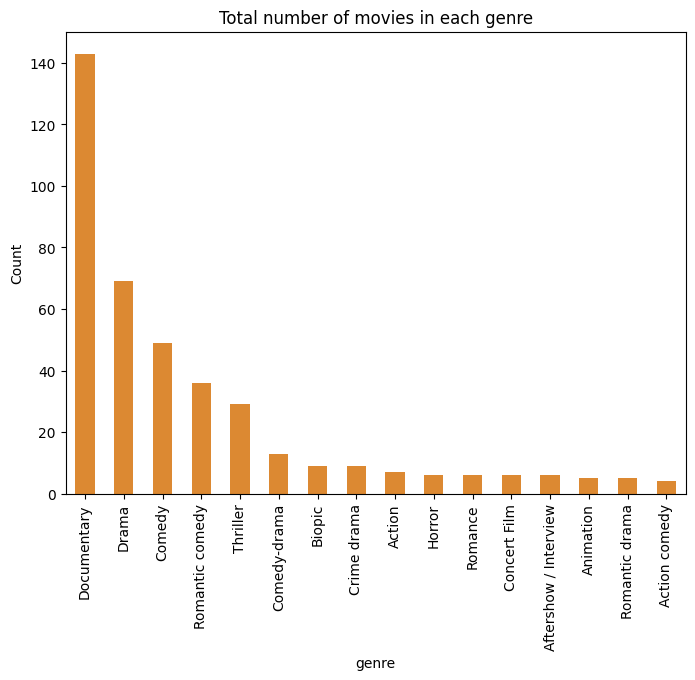

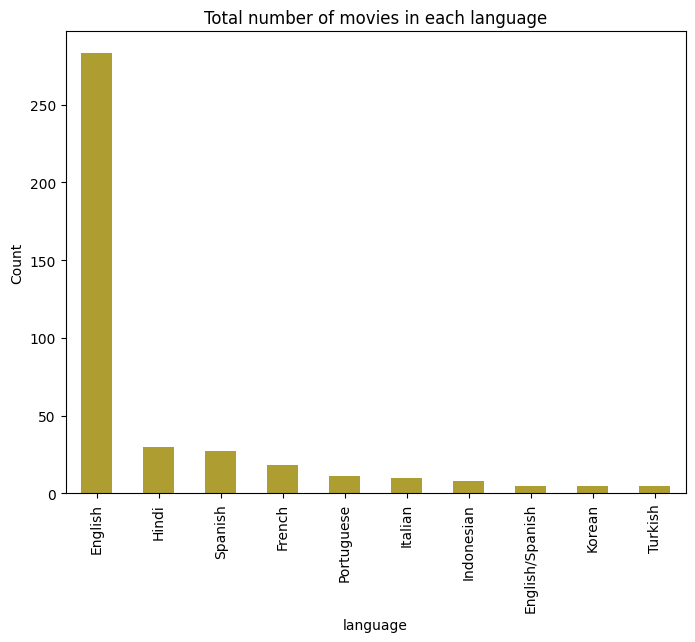

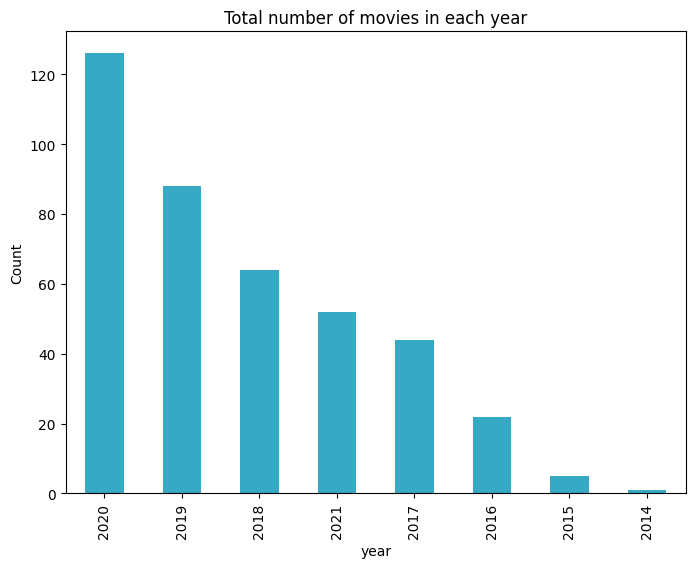

In [16]:
import pandas as pd
import matplotlib.pyplot as plt


palette = sns.color_palette('husl', len(df.columns))


for i, (column, color) in enumerate(zip(df.columns, palette)):
    if column in ['genre', 'language', 'year']:
        fig, ax = plt.subplots(figsize=(8, 6))
    
        df[column].value_counts().plot(kind='bar', ax=ax, color=color)

        ax.set_title(f'Total number of movies in each {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
    
    # Show plot
    plt.show()

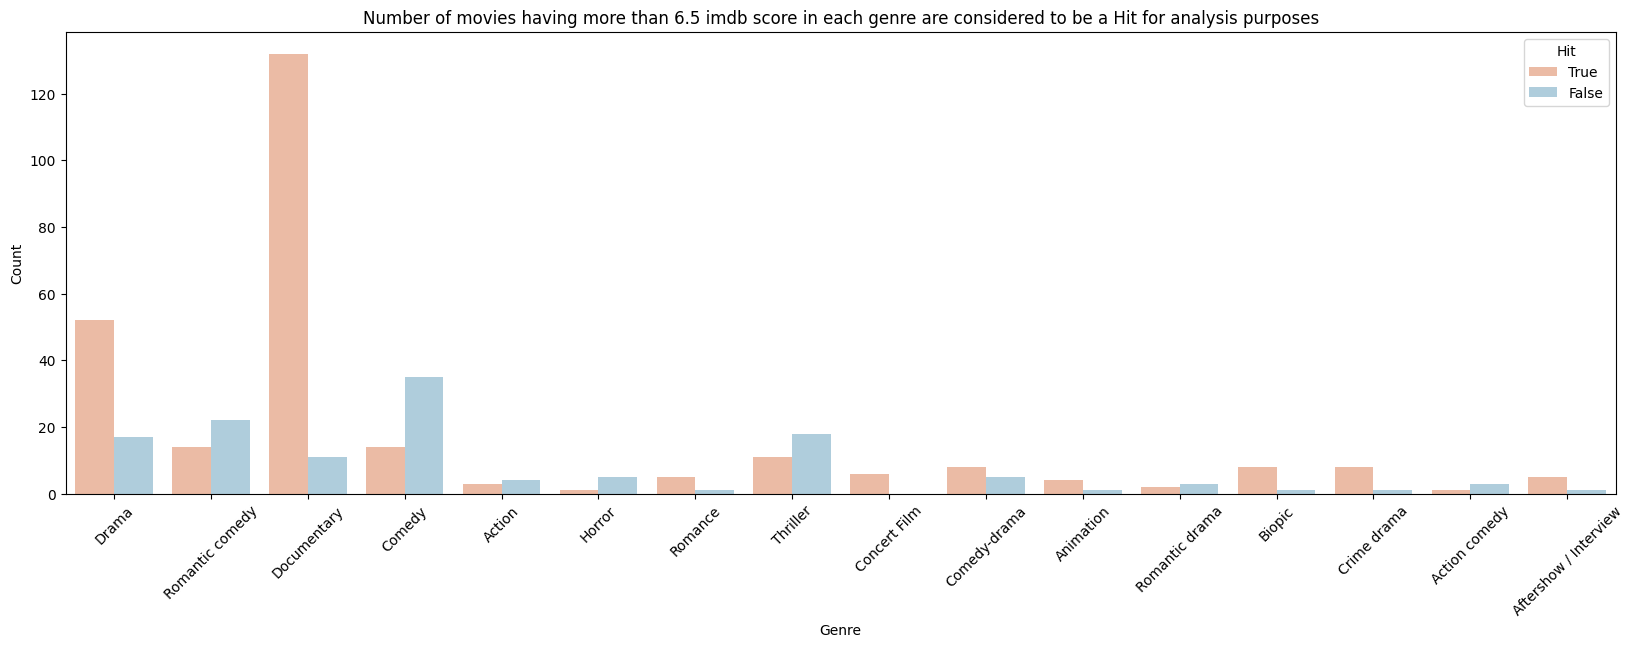

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


hue_order = [True, False]  

# Plotting the graph of genre and huing them based on "hit" column
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='genre', hue='Hit', hue_order=hue_order, palette= 'RdBu')
plt.title('Number of movies having more than 6.5 imdb score in each genre are considered to be a Hit for analysis purposes')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.legend(title='Hit', loc='upper right')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

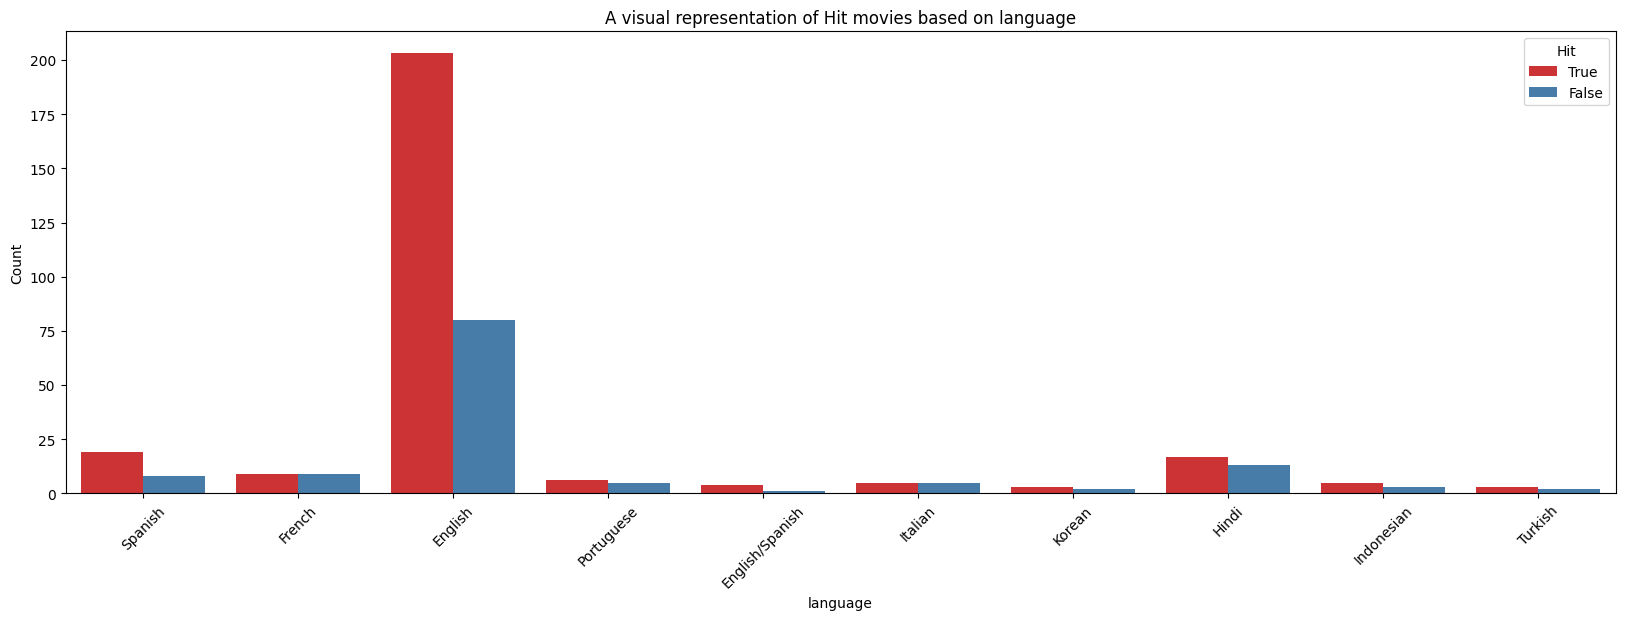

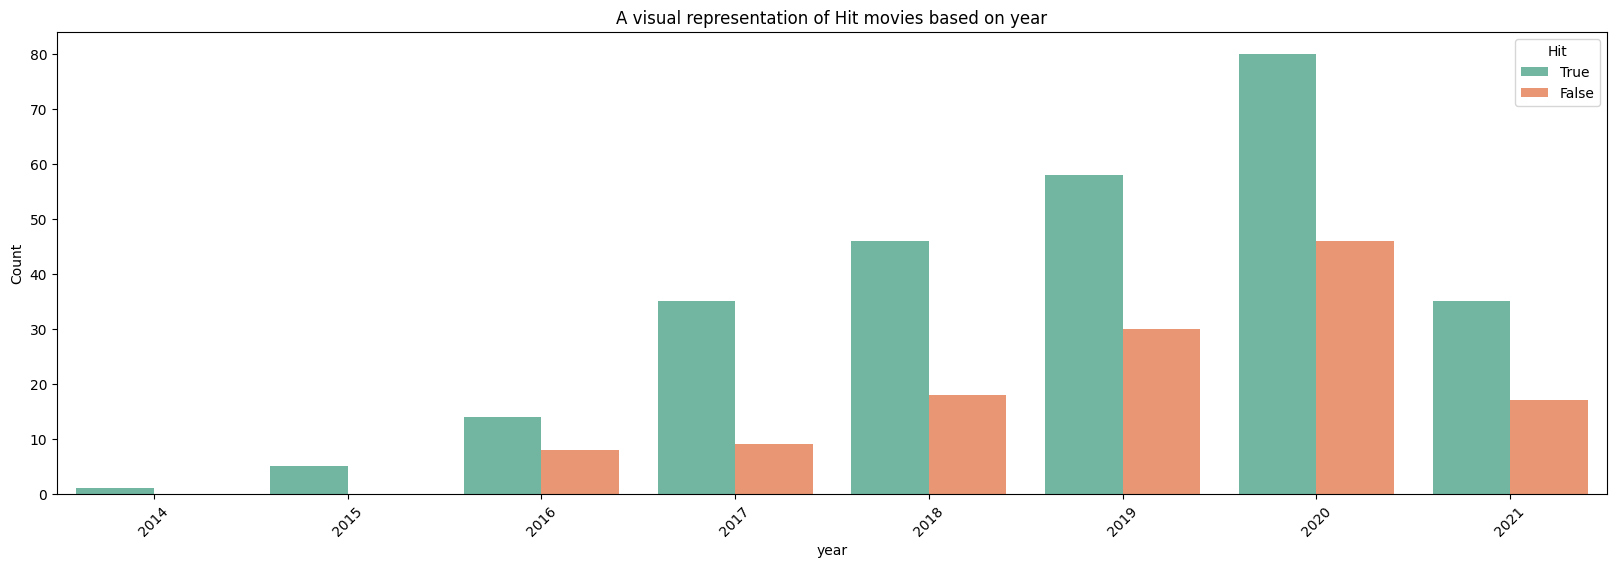

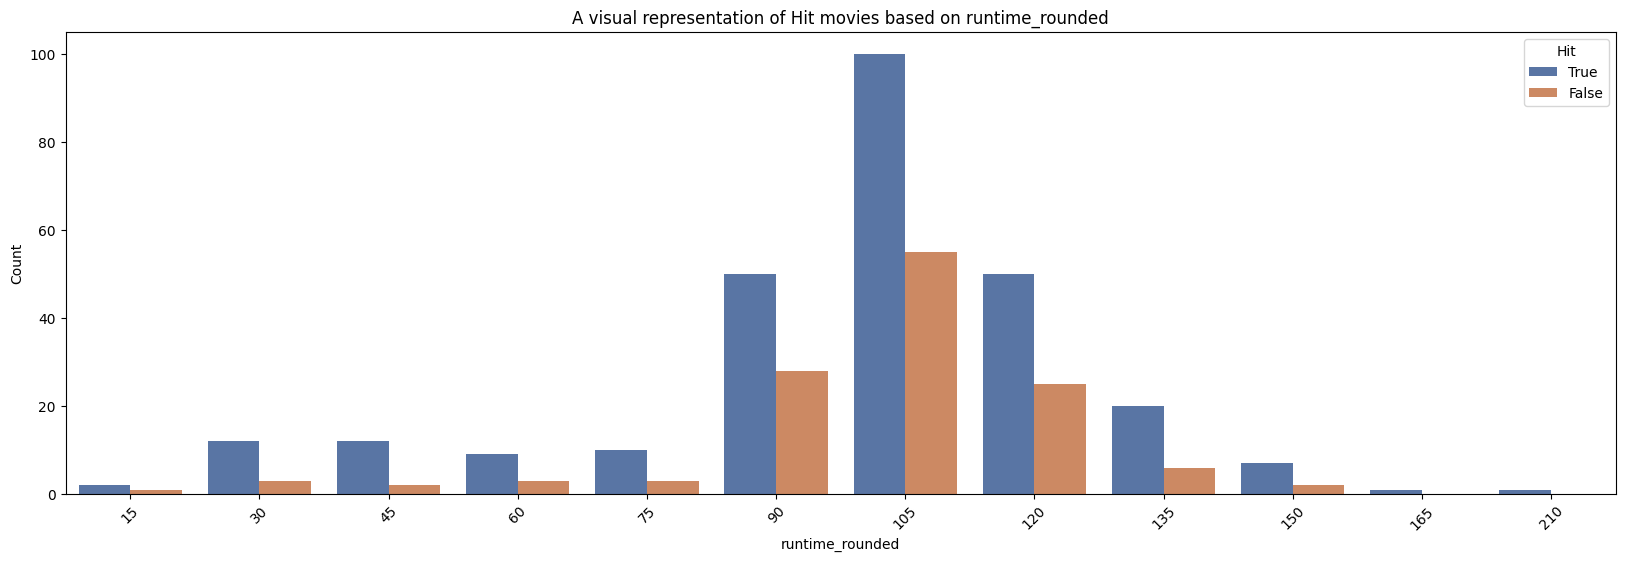

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['language', 'year', 'runtime_rounded' ]
palettes = ['Set1', 'Set2', 'deep']
hue_order = [True, False] 

for column, palette in zip(columns_to_plot, palettes):
    plt.figure(figsize=(20, 6))
    sns.countplot(data=df, x=column, hue='Hit', hue_order=hue_order ,palette=palette)
    plt.title(f'A visual representation of Hit movies based on {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Hit', loc='upper right')
    plt.xticks(rotation=45)  
    plt.show()

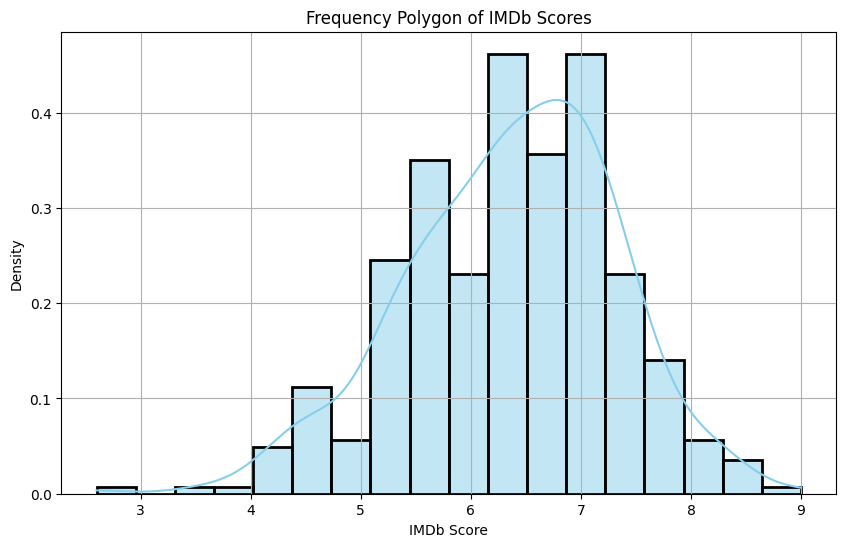

In [19]:

#frequency polugon of imdb score

import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

plt.figure(figsize=(10, 6))
sns.histplot(df['imdb_score'], kde=True, stat='density', color='skyblue', linewidth=2)
plt.title('Frequency Polygon of IMDb Scores')
plt.xlabel('IMDb Score')
plt.ylabel('Density')
plt.grid(True)
plt.show()


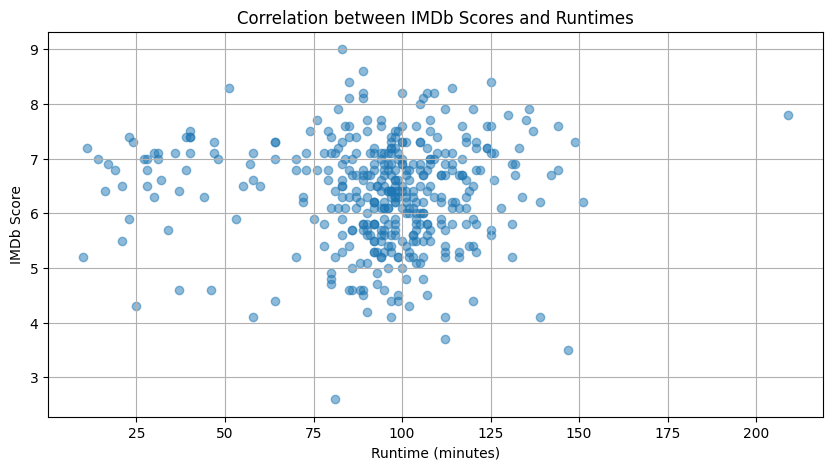

In [20]:

df_filtered = df.dropna(subset=['imdb_score', 'runtime'])

# Creating a scatter plot to visualize the correlation
plt.figure(figsize=(10, 5))
plt.scatter(df_filtered['runtime'], df_filtered['imdb_score'], alpha=0.5)
plt.title('Correlation between IMDb Scores and Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Score')
plt.grid(True)
plt.show()

 Runtimes of movies:
runtime
97     17
98     16
92     15
95     13
100    12
       ..
147     1
74      1
122     1
130     1
14      1
Name: count, Length: 100, dtype: int64


<Axes: xlabel='runtime'>

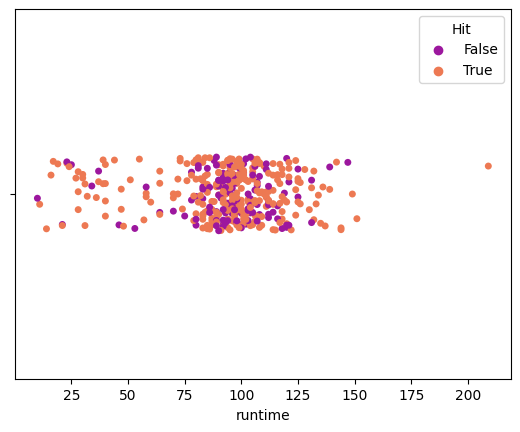

In [21]:
print(" Runtimes of movies:")
print((df['runtime'].value_counts()))
sns.stripplot(x='runtime' , data=df , hue='Hit',  palette='plasma')

# Defining the trends and patterns

**The following trends are observed in the given dataset**

1) Viewers are more likely to perceive documentaries and dramas films positively compared to other genres. In contrast, comedy and thriller are genres with the lowest imdb scores. 

2) During the years 2017 and 2018, the percentage of movies that were well-received by viewers was notably high. However, in subsequent years, there has been a marked increase in the proportion of films that did not achieve high IMDb scores.

3) The most common IMDb score among films is 7, indicating a central tendency towards moderate viewer satisfaction. 

4) While an ideal movie length is around 105 minutes, it is important to note that runtime does not have a significant impact on a film’s IMDb rating. This suggests that factors other than duration play a more crucial role in determining a movie's success and viewer reception.

5) A movie’s genre and its language is the leading factor in determining people satisfaction according to the analysation of the present dataset.



# Conclusions


* The dataset reveals a biased representation of movie productions, both in terms of language and genre. 
* Approximately 48% of the movies are in English, demonstrating a significant skew. 
* In terms of genre, documentaries account for 27% of the dataset, whereas some other genres represent only 0.17%, resulting in a highly unbalanced dataset for drawing insights.
* Additionally, the majority of movies in the dataset were produced between 2018 and 2020, highlighting a concentration of data in this period. 
* This imbalance in language and genre, along with the temporal concentration, poses challenges for comprehensive analysis and extraction of meaningful insights from the dataset.